## Salaries for Professors

[R documentation](http://finzi.psych.upenn.edu/R/library/car/html/Salaries.html)

In [1]:
using Gadfly
using DataFrames
using KernelDensity


This notebook gives a brief overview of statistical modelling and data wrangling in Julia. 

In [2]:
;wget https://raw.githubusercontent.com/aviks/ODSC/master/salaries.csv

--2017-11-02 23:49:48--  https://raw.githubusercontent.com/aviks/ODSC/master/salaries.csv
Resolving raw.githubusercontent.com... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12674 (12K) [text/plain]
Saving to: 'salaries.csv'

     0K .......... ..                                         100% 2.73M=0.004s

2017-11-02 23:49:48 (2.73 MB/s) - 'salaries.csv' saved [12674/12674]



Now let's load our data into a DataFrame. 

In [3]:
SalariesFrame = readtable("salaries.csv")

397×6 DataFrames.DataFrame
│ Row │ Rank        │ Discipline │ YrsSincePhD │ YrsService │ Sex      │
├─────┼─────────────┼────────────┼─────────────┼────────────┼──────────┤
│ 1   │ "Prof"      │ "B"        │ 19          │ 18         │ "Male"   │
│ 2   │ "Prof"      │ "B"        │ 20          │ 16         │ "Male"   │
│ 3   │ "AsstProf"  │ "B"        │ 4           │ 3          │ "Male"   │
│ 4   │ "Prof"      │ "B"        │ 45          │ 39         │ "Male"   │
│ 5   │ "Prof"      │ "B"        │ 40          │ 41         │ "Male"   │
│ 6   │ "AssocProf" │ "B"        │ 6           │ 6          │ "Male"   │
│ 7   │ "Prof"      │ "B"        │ 30          │ 23         │ "Male"   │
│ 8   │ "Prof"      │ "B"        │ 45          │ 45         │ "Male"   │
│ 9   │ "Prof"      │ "B"        │ 21          │ 20         │ "Male"   │
│ 10  │ "Prof"      │ "B"        │ 18          │ 18         │ "Female" │
│ 11  │ "AssocProf" │ "B"        │ 12          │ 8          │ "Male"   │
⋮
│ 386 │ "Prof"      │ "A"        │ 15          │ 9          │ "Male"   │
│ 387 │ "Prof"      │ "A"        │ 29          │ 27         │ "Male"   │
│ 388 │ "Prof"      │ "A"        │ 29          │ 15         │ "Male"   │
│ 389 │ "Prof"      │ "A"        │ 38          │ 36         │ "Male"   │
│ 390 │ "Prof"      │ "A"        │ 33          │ 18         │ "Male"   │
│ 391 │ "Prof"      │ "A"        │ 40          │ 19         │ "Male"   │
│ 392 │ "Prof"      │ "A"        │ 30          │ 19         │ "Male"   │
│ 393 │ "Prof"      │ "A"        │ 33          │ 30         │ "Male"   │
│ 394 │ "Prof"      │ "A"        │ 31          │ 19         │ "Male"   │
│ 395 │ "Prof"      │ "A"        │ 42          │ 25         │ "Male"   │
│ 396 │ "Prof"      │ "A"        │ 25          │ 15         │ "Male"   │
│ 397 │ "AsstProf"  │ "A"        │ 8           │ 4          │ "Male"   │

│ Row │ Salary │
├─────┼────────┤
│ 1   │ 139750 │
│ 2   │ 173200 │
│ 3   │ 79750  │
│ 4   │ 115000 │
│ 5   │ 141500 │
│ 6   │ 97000  │
│ 7   │ 175000 │
│ 8   │ 147765 │
│ 9   │ 119250 │
│ 10  │ 129000 │
│ 11  │ 119800 │
⋮
│ 386 │ 114330 │
│ 387 │ 139219 │
│ 388 │ 109305 │
│ 389 │ 119450 │
│ 390 │ 186023 │
│ 391 │ 166605 │
│ 392 │ 151292 │
│ 393 │ 103106 │
│ 394 │ 150564 │
│ 395 │ 101738 │
│ 396 │ 95329  │
│ 397 │ 81035  │

## Getting basic information about a DataFrame

In [4]:
size(SalariesFrame)

(397, 6)

In [5]:
names(SalariesFrame)

6-element Array{Symbol,1}:
 :Rank       
 :Discipline 
 :YrsSincePhD
 :YrsService 
 :Sex        
 :Salary     

In [6]:
head(SalariesFrame, 10)

10×6 DataFrames.DataFrame
│ Row │ Rank        │ Discipline │ YrsSincePhD │ YrsService │ Sex      │
├─────┼─────────────┼────────────┼─────────────┼────────────┼──────────┤
│ 1   │ "Prof"      │ "B"        │ 19          │ 18         │ "Male"   │
│ 2   │ "Prof"      │ "B"        │ 20          │ 16         │ "Male"   │
│ 3   │ "AsstProf"  │ "B"        │ 4           │ 3          │ "Male"   │
│ 4   │ "Prof"      │ "B"        │ 45          │ 39         │ "Male"   │
│ 5   │ "Prof"      │ "B"        │ 40          │ 41         │ "Male"   │
│ 6   │ "AssocProf" │ "B"        │ 6           │ 6          │ "Male"   │
│ 7   │ "Prof"      │ "B"        │ 30          │ 23         │ "Male"   │
│ 8   │ "Prof"      │ "B"        │ 45          │ 45         │ "Male"   │
│ 9   │ "Prof"      │ "B"        │ 21          │ 20         │ "Male"   │
│ 10  │ "Prof"      │ "B"        │ 18          │ 18         │ "Female" │

│ Row │ Salary │
├─────┼────────┤
│ 1   │ 139750 │
│ 2   │ 173200 │
│ 3   │ 79750  │
│ 4   │ 115000 │
│ 5   │ 141500 │
│ 6   │ 97000  │
│ 7   │ 175000 │
│ 8   │ 147765 │
│ 9   │ 119250 │
│ 10  │ 129000 │

In [7]:
tail(SalariesFrame)

6×6 DataFrames.DataFrame
│ Row │ Rank       │ Discipline │ YrsSincePhD │ YrsService │ Sex    │ Salary │
├─────┼────────────┼────────────┼─────────────┼────────────┼────────┼────────┤
│ 1   │ "Prof"     │ "A"        │ 30          │ 19         │ "Male" │ 151292 │
│ 2   │ "Prof"     │ "A"        │ 33          │ 30         │ "Male" │ 103106 │
│ 3   │ "Prof"     │ "A"        │ 31          │ 19         │ "Male" │ 150564 │
│ 4   │ "Prof"     │ "A"        │ 42          │ 25         │ "Male" │ 101738 │
│ 5   │ "Prof"     │ "A"        │ 25          │ 15         │ "Male" │ 95329  │
│ 6   │ "AsstProf" │ "A"        │ 8           │ 4          │ "Male" │ 81035  │

In [8]:
describe(SalariesFrame)

Rank
Summary Stats:
Length:         397
Type:           String
Number Unique:  3
Number Missing: 0
% Missing:      0.000000

Discipline
Summary Stats:
Length:         397
Type:           String
Number Unique:  2
Number Missing: 0
% Missing:      0.000000

YrsSincePhD
Summary Stats:
Mean:           22.314861
Minimum:        1.000000
1st Quartile:   12.000000
Median:         21.000000
3rd Quartile:   32.000000
Maximum:        56.000000
Length:         397
Type:           Int64
Number Missing: 0
% Missing:      0.000000

YrsService
Summary Stats:
Mean:           17.614610
Minimum:        0.000000
1st Quartile:   7.000000
Median:         16.000000
3rd Quartile:   27.000000
Maximum:        60.000000
Length:         397
Type:           Int64
Number Missing: 0
% Missing:      0.000000

Sex
Summary Stats:
Length:         397
Type:           String
Number Unique:  2
Number Missing: 0
% Missing:      0.000000

Salary
Summary Stats:
Mean:           113706.458438
Minimum:        57800.000000
1st Q

## Basic manipulation of a DataFrame

For example, we can sort our dataframe by a column, or multiple columns. This next command sorts the dataframe in the ascending order of `YrsService`, and additionally by `YearsSincePhd` within rows that have equal `YrsService`

In [9]:
sort!(SalariesFrame, cols=[:YrsService, :YrsSincePhD])

397×6 DataFrames.DataFrame
│ Row │ Rank        │ Discipline │ YrsSincePhD │ YrsService │ Sex      │
├─────┼─────────────┼────────────┼─────────────┼────────────┼──────────┤
│ 1   │ "AsstProf"  │ "B"        │ 1           │ 0          │ "Male"   │
│ 2   │ "AsstProf"  │ "B"        │ 1           │ 0          │ "Male"   │
│ 3   │ "AsstProf"  │ "B"        │ 2           │ 0          │ "Male"   │
│ 4   │ "AsstProf"  │ "A"        │ 2           │ 0          │ "Female" │
│ 5   │ "AsstProf"  │ "A"        │ 2           │ 0          │ "Male"   │
│ 6   │ "AsstProf"  │ "B"        │ 4           │ 0          │ "Male"   │
│ 7   │ "AsstProf"  │ "B"        │ 4           │ 0          │ "Male"   │
│ 8   │ "AsstProf"  │ "B"        │ 5           │ 0          │ "Female" │
│ 9   │ "AsstProf"  │ "A"        │ 5           │ 0          │ "Male"   │
│ 10  │ "AsstProf"  │ "B"        │ 11          │ 0          │ "Male"   │
│ 11  │ "Prof"      │ "A"        │ 12          │ 0          │ "Female" │
⋮
│ 386 │ "Prof"      │ "B"        │ 45          │ 45         │ "Male"   │
│ 387 │ "Prof"      │ "A"        │ 45          │ 45         │ "Male"   │
│ 388 │ "Prof"      │ "B"        │ 46          │ 45         │ "Male"   │
│ 389 │ "Prof"      │ "A"        │ 46          │ 46         │ "Male"   │
│ 390 │ "Prof"      │ "A"        │ 52          │ 48         │ "Male"   │
│ 391 │ "AssocProf" │ "A"        │ 49          │ 49         │ "Male"   │
│ 392 │ "Prof"      │ "A"        │ 54          │ 49         │ "Male"   │
│ 393 │ "Prof"      │ "B"        │ 56          │ 49         │ "Male"   │
│ 394 │ "Prof"      │ "A"        │ 51          │ 51         │ "Male"   │
│ 395 │ "AssocProf" │ "B"        │ 48          │ 53         │ "Male"   │
│ 396 │ "Prof"      │ "A"        │ 56          │ 57         │ "Male"   │
│ 397 │ "Prof"      │ "B"        │ 49          │ 60         │ "Male"   │

│ Row │ Salary │
├─────┼────────┤
│ 1   │ 88000  │
│ 2   │ 88795  │
│ 3   │ 78000  │
│ 4   │ 72500  │
│ 5   │ 85000  │
│ 6   │ 84000  │
│ 7   │ 92000  │
│ 8   │ 77000  │
│ 9   │ 74000  │
│ 10  │ 77000  │
│ 11  │ 105000 │
⋮
│ 386 │ 146856 │
│ 387 │ 107550 │
│ 388 │ 67559  │
│ 389 │ 100600 │
│ 390 │ 107200 │
│ 391 │ 81800  │
│ 392 │ 78162  │
│ 393 │ 186960 │
│ 394 │ 57800  │
│ 395 │ 90000  │
│ 396 │ 76840  │
│ 397 │ 192253 │

Since our data is quite "categorical", meaning it has a few categories, we can perform something called "pooling". This would simply store the unique values in the column and an array of references.

In [10]:
pool!(SalariesFrame, [:Discipline, :Sex])

We can also find the unique values in a column by using `levels`

In [11]:
levels(SalariesFrame[:Sex])

2-element Array{String,1}:
 "Female"
 "Male"  

## Exploratory statistical analysis of professorial salaries

**By**: Split-Apply-Combine 

In [11]:
by(SalariesFrame, :Rank) do df
  DataFrame(
    n = length(df[:Salary]),
    mean = round(mean(df[:Salary]), 3),
    std = round(std(df[:Salary]), 3)
  )
end

3×4 DataFrames.DataFrame
│ Row │ Rank        │ n   │ mean      │ std     │
├─────┼─────────────┼─────┼───────────┼─────────┤
│ 1   │ "AssocProf" │ 64  │ 93876.4   │ 13831.7 │
│ 2   │ "AsstProf"  │ 67  │ 80776.0   │ 8174.11 │
│ 3   │ "Prof"      │ 266 │ 1.26772e5 │ 27718.7 │

In [12]:
by(SalariesFrame, :Discipline) do df
  DataFrame(
    n = length(df[:Salary]),
    mean = round(mean(df[:Salary]), 3),
    std = round(std(df[:Salary]), 3)
  )
end

2×4 DataFrames.DataFrame
│ Row │ Discipline │ n   │ mean      │ std     │
├─────┼────────────┼─────┼───────────┼─────────┤
│ 1   │ "A"        │ 181 │ 1.08548e5 │ 30538.1 │
│ 2   │ "B"        │ 216 │ 1.18029e5 │ 29459.1 │

In [13]:
by(SalariesFrame, :Sex) do df
  DataFrame(
    n = length(df[:Salary]),
    mean = round(mean(df[:Salary]), 3),
    std = round(std(df[:Salary]), 3)
  )
end

2×4 DataFrames.DataFrame
│ Row │ Sex      │ n   │ mean      │ std     │
├─────┼──────────┼─────┼───────────┼─────────┤
│ 1   │ "Female" │ 39  │ 1.01002e5 │ 25952.1 │
│ 2   │ "Male"   │ 358 │ 1.1509e5  │ 30436.9 │

In [14]:
by(SalariesFrame, [:Rank, :Discipline]) do df
  DataFrame(
    n = length(df[:Salary]),
    mean = round(mean(df[:Salary]), 3),
    std = round(std(df[:Salary]), 3)
  )
end

6×5 DataFrames.DataFrame
│ Row │ Rank        │ Discipline │ n   │ mean      │ std     │
├─────┼─────────────┼────────────┼─────┼───────────┼─────────┤
│ 1   │ "AssocProf" │ "A"        │ 26  │ 83061.1   │ 11050.5 │
│ 2   │ "AssocProf" │ "B"        │ 38  │ 1.01276e5 │ 10237.6 │
│ 3   │ "AsstProf"  │ "A"        │ 24  │ 73935.5   │ 4726.83 │
│ 4   │ "AsstProf"  │ "B"        │ 43  │ 84593.9   │ 7148.4  │
│ 5   │ "Prof"      │ "A"        │ 131 │ 1.19948e5 │ 27960.2 │
│ 6   │ "Prof"      │ "B"        │ 135 │ 1.33394e5 │ 25909.8 │

In [15]:
by(SalariesFrame, [:Rank, :Sex]) do df
  DataFrame(
    n = length(df[:Salary]),
    mean = round(mean(df[:Salary]), 3),
    std = round(std(df[:Salary]), 3)
  )
end

6×5 DataFrames.DataFrame
│ Row │ Rank        │ Sex      │ n   │ mean      │ std     │
├─────┼─────────────┼──────────┼─────┼───────────┼─────────┤
│ 1   │ "AssocProf" │ "Female" │ 10  │ 88512.8   │ 17965.3 │
│ 2   │ "AssocProf" │ "Male"   │ 54  │ 94869.7   │ 12890.8 │
│ 3   │ "AsstProf"  │ "Female" │ 11  │ 78049.9   │ 9372.0  │
│ 4   │ "AsstProf"  │ "Male"   │ 56  │ 81311.5   │ 7901.34 │
│ 5   │ "Prof"      │ "Female" │ 18  │ 1.21968e5 │ 19619.6 │
│ 6   │ "Prof"      │ "Male"   │ 248 │ 1.27121e5 │ 28213.8 │

In [16]:
by(SalariesFrame, [:Discipline, :Sex]) do df
  DataFrame(
    n = length(df[:Salary]),
    mean = round(mean(df[:Salary]), 3),
    std = round(std(df[:Salary]), 3)
  )
end

4×5 DataFrames.DataFrame
│ Row │ Discipline │ Sex      │ n   │ mean      │ std     │
├─────┼────────────┼──────────┼─────┼───────────┼─────────┤
│ 1   │ "A"        │ "Female" │ 18  │ 89064.9   │ 21638.6 │
│ 2   │ "A"        │ "Male"   │ 163 │ 110700.0  │ 30663.1 │
│ 3   │ "B"        │ "Female" │ 21  │ 1.11235e5 │ 25367.2 │
│ 4   │ "B"        │ "Male"   │ 195 │ 1.1876e5  │ 29831.3 │

In [17]:
by(SalariesFrame, [:Rank, :Discipline, :Sex]) do df
  DataFrame(
    n = length(df[:Salary]),
    mean = round(mean(df[:Salary]), 3),
    std = round(std(df[:Salary]), 3)
  )
end

12×6 DataFrames.DataFrame
│ Row │ Rank        │ Discipline │ Sex      │ n   │ mean      │ std     │
├─────┼─────────────┼────────────┼──────────┼─────┼───────────┼─────────┤
│ 1   │ "AssocProf" │ "A"        │ "Female" │ 4   │ 72128.5   │ 6402.72 │
│ 2   │ "AssocProf" │ "A"        │ "Male"   │ 22  │ 85048.9   │ 10611.9 │
│ 3   │ "AssocProf" │ "B"        │ "Female" │ 6   │ 99435.7   │ 14086.5 │
│ 4   │ "AssocProf" │ "B"        │ "Male"   │ 32  │ 1.01622e5 │ 9607.89 │
│ 5   │ "AsstProf"  │ "A"        │ "Female" │ 6   │ 72933.3   │ 5463.21 │
│ 6   │ "AsstProf"  │ "A"        │ "Male"   │ 18  │ 74269.6   │ 4580.13 │
│ 7   │ "AsstProf"  │ "B"        │ "Female" │ 5   │ 84189.8   │ 9792.12 │
│ 8   │ "AsstProf"  │ "B"        │ "Male"   │ 38  │ 84647.1   │ 6900.29 │
│ 9   │ "Prof"      │ "A"        │ "Female" │ 8   │ 1.09632e5 │ 15094.6 │
│ 10  │ "Prof"      │ "A"        │ "Male"   │ 123 │ 1.20619e5 │ 28504.9 │
│ 11  │ "Prof"      │ "B"        │ "Female" │ 10  │ 1.31836e5 │ 17504.3 │
│ 12  │ "Prof"      │ "B"        │ "Male"   │ 125 │ 1.33518e5 │ 26514.3 │

### BoxPlots

Boxplots tend to give us a good idea of the distribution of the data, by plotting minimum, maximum and first and third quartile. 

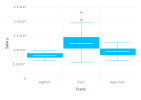

In [46]:
plot(SalariesFrame, x="Rank", y="Salary", Geom.boxplot)

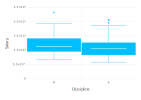

In [47]:
plot(SalariesFrame, x="Discipline", y="Salary", Geom.boxplot)

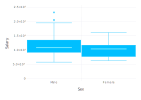

In [48]:
plot(SalariesFrame, x="Sex", y="Salary", Geom.boxplot)

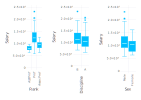

In [49]:
hstack(
  plot(SalariesFrame, x="Rank", y="Salary", Geom.boxplot),
  plot(SalariesFrame, x="Discipline", y="Salary", Geom.boxplot),
  plot(SalariesFrame, x="Sex", y="Salary", Geom.boxplot)
)

### Scatter Plots

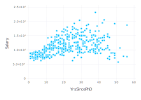

In [22]:
plot(SalariesFrame, x="YrsSincePhD", y="Salary")

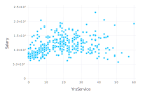

In [23]:
plot(SalariesFrame, x="YrsService", y="Salary")

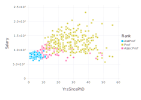

In [24]:
plot(SalariesFrame, x="YrsSincePhD", y="Salary", color="Rank")

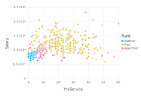

In [25]:
plot(SalariesFrame, x="YrsService", y="Salary", color="Rank")

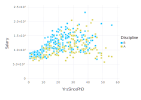

In [26]:
plot(SalariesFrame, x="YrsSincePhD", y="Salary", color="Discipline")

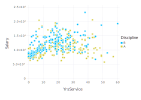

In [27]:
plot(SalariesFrame, x="YrsService", y="Salary", color="Discipline")

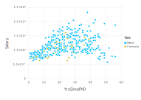

In [28]:
plot(SalariesFrame, x="YrsSincePhD", y="Salary", color="Sex")

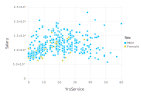

In [29]:
plot(SalariesFrame, x="YrsService", y="Salary", color="Sex")

### Histograms

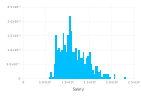

In [30]:
plot(SalariesFrame, x="Salary", Geom.histogram(bincount=50, density=true))

## Kernel Density Estimators

They give you some estimate of the probability distribition of a variable.

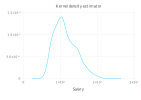

In [31]:
salaries = kde(SalariesFrame[:Salary])

plot(
  x=salaries.x,
  y=salaries.density,
  Geom.line,
  Guide.xlabel("Salary"),
  Guide.ylabel(""),
  Guide.title("Kernel density estimator")
)

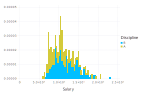

In [32]:
plot(SalariesFrame, x="Salary", color="Discipline", Geom.histogram(bincount=50, density=true))

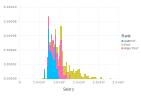

In [33]:
plot(SalariesFrame, x="Salary", color="Rank", Geom.histogram(bincount=50, density=true))

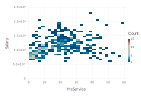

In [34]:
plot(SalariesFrame, x="YrsService", y="Salary", Geom.histogram2d(xbincount=30, ybincount=30))

# Generalised Linear Models

https://github.com/JuliaStats/GLM.jl

In [47]:
using GLM

INFO: Cloning cache of GLM from https://github.com/JuliaStats/GLM.jl.git
INFO: Installing GLM v0.8.1
INFO: Building SpecialFunctions
INFO: Building Rmath
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of GLM
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Precompiling module GLM.


In [48]:
fit(LinearModel, @formula(Salary ~ YrsSincePhD + YrsService), SalariesFrame )

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: Salary ~ 1 + YrsSincePhD + YrsService

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)   89912.2   2843.56  31.6196   <1e-99
YrsSincePhD   1562.89    256.82  6.08555    <1e-8
YrsService   -629.101   254.469 -2.47221   0.0138


In [49]:
fit(LinearModel,@formula(Salary ~ YrsSincePhD + YrsService + Sex + Discipline),SalariesFrame )

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: Salary ~ 1 + YrsSincePhD + YrsService + Sex + Discipline

Coefficients:
               Estimate Std.Error  t value Pr(>|t|)
(Intercept)     71325.8   4981.84  14.3172   <1e-36
YrsSincePhD     1804.15   248.867  7.24943   <1e-11
YrsService       -770.1   244.106 -3.15478   0.0017
Sex: Male       7545.31    4462.6  1.69079   0.0917
Discipline: B   16325.4    2708.9  6.02658    <1e-8


# Random Forests

https://github.com/bensadeghi/DecisionTree.jl

In [38]:
using DecisionTree

INFO: Precompiling module DecisionTree.


A decision tree based model which learns salary based on YrsSincePhD and YrsService. Maximum tree depth of 10.

In [44]:
model = build_forest(Array(SalariesFrame[:Salary]),
                     Array(SalariesFrame[[:YrsSincePhD,:YrsService]]),
                     2, 10)

Ensemble of Decision Trees
Trees:      10
Avg Leaves: 158.1
Avg Depth:  9.0

Predict and see if our model worked.

In [45]:
apply_forest(model, Array(SalariesFrame[[:YrsSincePhD,:YrsService]])) .-  SalariesFrame[:Salary]

397-element DataArrays.DataArray{Any,1}:
      0
   -795
   7000
  12500
      0
      0
  -8000
  -3000
      0
      0
      0
  -6932
      0
      ⋮
      0
  39306
      0
      0
      0
      0
 108798
      0
      0
      0
      0
      0

# Query using Query.jl

`Query.jl` lets you query almost anything in Julia. It can filter, project, join and group data from any iterable data source. 

In [43]:
using Query

INFO: Precompiling module TableTraits.
INFO: Precompiling module IterableTables.
INFO: Precompiling module DataValues.


In [54]:
q = @from i in SalariesFrame begin
    @where i.Discipline == "A"
    @select {i.Rank,i.Salary}
    @collect DataFrame
end

181×2 DataFrames.DataFrame
│ Row │ Rank        │ Salary │
├─────┼─────────────┼────────┤
│ 1   │ "AsstProf"  │ 72500  │
│ 2   │ "AsstProf"  │ 85000  │
│ 3   │ "AsstProf"  │ 74000  │
│ 4   │ "Prof"      │ 105000 │
│ 5   │ "AsstProf"  │ 72500  │
│ 6   │ "AsstProf"  │ 72500  │
│ 7   │ "AsstProf"  │ 63900  │
│ 8   │ "AsstProf"  │ 72500  │
│ 9   │ "AsstProf"  │ 73000  │
│ 10  │ "AsstProf"  │ 74856  │
│ 11  │ "AssocProf" │ 108413 │
⋮
│ 170 │ "Prof"      │ 155865 │
│ 171 │ "Prof"      │ 72300  │
│ 172 │ "Prof"      │ 105000 │
│ 173 │ "Prof"      │ 144050 │
│ 174 │ "Prof"      │ 89650  │
│ 175 │ "Prof"      │ 107550 │
│ 176 │ "Prof"      │ 100600 │
│ 177 │ "Prof"      │ 107200 │
│ 178 │ "AssocProf" │ 81800  │
│ 179 │ "Prof"      │ 78162  │
│ 180 │ "Prof"      │ 57800  │
│ 181 │ "Prof"      │ 76840  │

In [55]:
q = @from i in SalariesFrame begin
    @group i.Salary by i.Rank into g
    @select {Key=g.key,Avg=sum(g)/length(g)}
    @collect DataFrame
end

3×2 DataFrames.DataFrame
│ Row │ Key         │ Avg       │
├─────┼─────────────┼───────────┤
│ 1   │ "AsstProf"  │ 80776.0   │
│ 2   │ "Prof"      │ 1.26772e5 │
│ 3   │ "AssocProf" │ 93876.4   │